# INCREMENT-SOT CAZ-AVI

Análisis estadístico para la cohort **INCREMENT-SOT CAZ-AVI** para el estudio retrospectivo del tratamiento con CAZ-AVI frente al resto de terapias disponibles en diferentes centros.

## Control por Propensity-score

                                              ["Age", "Gender",
                                               "Biliary_stenosis", "CMV_disease",
                                               "Kidney_disease", "Post_transplant_dialysis",
                                               "Score_Charlson_AMN", "Acquisition",
                                               "SIRS_SevereORSchock", "Pitt_Score",
                                               "Source_infection_Urinary_tract",
                                               "Source_infection_Pneumonia",
                                               "SourceControl_before30days", "Surgical_debridement",
                                               "Carbapenemase", "Removal_Replacement_vascular_line",
                                               "Myocardial_Infarct", "Diabetes_Mellitus",
                                               "Chronic_Pulmonary_Disease"]



## Tablas

### Tabla 1

In [2]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.pipeline import BivariantTable

result = BivariantTable(dataframe = workDataframe,
                        classVariable = "Cohort_Cazavi",
                        excludedVariables = ["Pt", "ps_cvsm", "Caso_REC_3digitos"]).run()

result.to_excel("tabla_1_raw.xlsx")
result

,Variable,All,no,yes,P_value,Test,Variable_type,Normality,Homocedasticity
0,Center,,,,0.001,Pearson Chi Square Test,categorical,,
1,----> Center-FMUSP,8 (0.05),7 (0.11),1 (0.01),0.031,Pearson Chi Square Test,categorical,,
2,----> Center-Gemelli,19 (0.13),4 (0.06),15 (0.18),0.053,Pearson Chi Square Test,categorical,,
3,----> Center-HCKT,21 (0.14),16 (0.24),5 (0.06),0.003,Pearson Chi Square Test,categorical,,
4,----> Center-HPG23,8 (0.05),3 (0.05),5 (0.06),0.975,Pearson Chi Square Test,categorical,,
...,...,...,...,...,...,...,...,...,...
1,----> Source_infection_other-no,143 (0.96),66 (1.00),77 (0.93),0.070,Pearson Chi Square Test,categorical,,
2,----> Source_infection_other-yes,6 (0.04),0 (0.00),6 (0.07),0.070,Pearson Chi Square Test,categorical,,
0,ps_cvsb,0.56 (0.37 - 0.76),0.43 (0.30 - 0.62),0.67 (0.53 - 0.85),0.000,Mann Whitney U Test,numerical,No,Yes
0,Cazavi_rescue,,,,1.000,Pearson Chi Square Test,categorical,,


### Tabla 2.A

In [3]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.test.multivariant import LogisticRegression

targetVariable = ["Gender",
                  "ICS_SOT_score",
                  "Cohort_Cazavi",
                  "ps_cvsb"]

result = LogisticRegression(dataframe = workDataframe,
                            classVariable = "Clinical_success_14d",
                            targetVariable = targetVariable).run()

result.params.to_excel("tabla_2a_params_raw.xlsx")
result.summary.to_excel("tabla_2a_metrics_raw.xlsx")
result.params

,Predictor,aOR,CI 2.5%,CI 97.5%,P value,Coef,Raw CI 2.5%,Raw CI 97.5%,Standard Err.
0,Intercept,3.708645,0.967821,14.211352,0.055845,1.310667,-0.032708,2.654041,0.685408
1,ICS_SOT_score,0.813710,0.737184,0.898180,0.000043,-0.206151,-0.304918,-0.107385,0.050392
2,ps_cvsb,1.627478,0.213090,12.429867,0.638699,0.487032,-1.546039,2.520102,1.037300
3,Gender_male,2.624401,1.009805,6.820605,0.047705,0.964853,0.009758,1.919948,0.487302
4,Cohort_Cazavi_yes,2.649322,1.025685,6.843142,0.044184,0.974304,0.025361,1.923247,0.484164


In [4]:
result.summary

,Value,CI 2.5%,CI 97.5%
Area under curve ROC,0.789794,0.699990,0.879598
Best Cutoff,0.729561,0.677460,0.781662
Accuracy,0.742857,0.668250,0.817465
Error,0.257143,0.182535,0.331750
Precision,0.882353,0.813479,0.951227
Recall,0.742574,0.654796,0.830353
F1,0.806452,0.741949,0.870954
Sensitivity,0.742574,0.654796,0.830353
Specificity,0.743590,0.606349,0.880830
PPV,0.882353,0.813479,0.951227


### Tabla 2.B

In [5]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["ICS_SOT_score"] >= 8]

from pystats_utils.test.multivariant import LogisticRegression

targetVariable = ["Gender",
                   "Cohort_Cazavi",
                   "ps_cvsb"]

result = LogisticRegression(dataframe = workDataframe,
                            classVariable = "Clinical_success_14d",
                            targetVariable = targetVariable).run()

result.params.to_excel("tabla_2b_params_raw.xlsx")
result.summary.to_excel("tabla_2b_metrics_raw.xlsx")
result.params

,Predictor,aOR,CI 2.5%,CI 97.5%,P value,Coef,Raw CI 2.5%,Raw CI 97.5%,Standard Err.
0,Intercept,0.135072,0.031240,0.584016,0.007364,-2.001947,-3.466068,-0.537826,0.747014
1,ps_cvsb,1.870961,0.163374,21.426295,0.614553,0.626452,-1.811714,3.064619,1.243985
2,Gender_male,4.595092,1.356525,15.565411,0.014293,1.524989,0.304926,2.745051,0.622492
3,Cohort_Cazavi_yes,4.133872,1.274053,13.413017,0.018114,1.419215,0.242203,2.596226,0.600527


In [6]:
result.summary

,Value,CI 2.5%,CI 97.5%
Area under curve ROC,0.750700,0.628800,0.872601
Best Cutoff,0.481933,0.365965,0.597902
Accuracy,0.723684,0.625866,0.821502
Error,0.276316,0.178498,0.374134
Precision,0.769231,0.640019,0.898442
Recall,0.714286,0.578699,0.849872
F1,0.740741,0.634527,0.846954
Sensitivity,0.714286,0.578699,0.849872
Specificity,0.735294,0.588107,0.882482
PPV,0.769231,0.640019,0.898442


### Tabla 3.A

In [7]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.test.multivariant import LogisticRegression

targetVariable = ["Gender",
                   "ICS_SOT_score",
                   "Cohort_Cazavi",
                   "ps_cvsb"]

result = LogisticRegression(dataframe = workDataframe,
                            classVariable = "Clinical_success_30d",
                            targetVariable = targetVariable).run()

result.params.to_excel("tabla_3a_params_raw.xlsx")
result.summary.to_excel("tabla_3a_metrics_raw.xlsx")
result.params

,Predictor,aOR,CI 2.5%,CI 97.5%,P value,Coef,Raw CI 2.5%,Raw CI 97.5%,Standard Err.
0,Intercept,3.510539,0.873811,14.103605,0.076752,1.255770,-0.134891,2.646430,0.709534
1,ICS_SOT_score,0.803338,0.723880,0.891519,0.000038,-0.218979,-0.323130,-0.114829,0.053139
2,ps_cvsb,1.926675,0.232546,15.962764,0.543268,0.655796,-1.458667,2.770259,1.078827
3,Gender_male,3.078909,1.137658,8.332631,0.026838,1.124575,0.128972,2.120179,0.507970
4,Cohort_Cazavi_yes,3.140749,1.174849,8.396233,0.022540,1.144461,0.161140,2.127783,0.501704


In [8]:
result.summary

,Value,CI 2.5%,CI 97.5%
Area under curve ROC,0.811598,0.727113,0.896083
Best Cutoff,0.735433,0.671103,0.799762
Accuracy,0.771429,0.702280,0.840577
Error,0.228571,0.159423,0.297720
Precision,0.908046,0.848428,0.967664
Recall,0.766990,0.685359,0.848622
F1,0.831579,0.773856,0.889302
Sensitivity,0.766990,0.685359,0.848622
Specificity,0.783784,0.652155,0.915413
PPV,0.908046,0.848428,0.967664


### Tabla 3.B

In [9]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["ICS_SOT_score"] >= 8]

from pystats_utils.test.multivariant import LogisticRegression

targetVariable = ["Gender",
                   "Cohort_Cazavi",
                   "ps_cvsb"]

result = LogisticRegression(dataframe = workDataframe,
                            classVariable = "Clinical_success_30d",
                            targetVariable = targetVariable).run()

result.params.to_excel("tabla_3b_params_raw.xlsx")
result.summary.to_excel("tabla_3b_metrics_raw.xlsx")
result.params

,Predictor,aOR,CI 2.5%,CI 97.5%,P value,Coef,Raw CI 2.5%,Raw CI 97.5%,Standard Err.
0,Intercept,0.107991,0.023753,0.490978,0.003969,-2.225705,-3.740053,-0.711357,0.772641
1,ps_cvsb,2.666262,0.221467,32.099379,0.439821,0.980678,-1.507481,3.468837,1.269492
2,Gender_male,4.992280,1.439457,17.314071,0.011275,1.607893,0.364266,2.851520,0.634515
3,Cohort_Cazavi_yes,4.466102,1.347233,14.805213,0.014389,1.496516,0.298053,2.694979,0.611472


In [10]:
result.summary

,Value,CI 2.5%,CI 97.5%
Area under curve ROC,0.775194,0.657188,0.893199
Best Cutoff,0.513837,0.412633,0.615042
Accuracy,0.723684,0.625731,0.821638
Error,0.276316,0.178362,0.374269
Precision,0.789474,0.662137,0.916810
Recall,0.697674,0.562050,0.833299
F1,0.740741,0.634883,0.846598
Sensitivity,0.697674,0.562050,0.833299
Specificity,0.757576,0.612342,0.902809
PPV,0.789474,0.662137,0.916810


### Tabla 4.A

In [11]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.test.multivariant import CoxPhRegression

targetVariable = ["Gender",
                   "Age",
                   "ICS_SOT_score",
                   "Cohort_Cazavi",
                   "ps_cvsb"]

result = CoxPhRegression(dataframe = workDataframe,
                         eventVariable = "Mortality_31d",
                         timeVariable = "Time2death_31d_alt",
                         targetVariable = targetVariable).run()

result.params.to_excel("tabla_4a_params_raw.xlsx")
result.summary.to_excel("tabla_4a_metrics_raw.xlsx")
result.params

,Predictor,aHR,CI 2.5%,CI 97.5%,P values,Raw Coef,Raw CI 2.5%,Raw CI 97.5%,Std Error
Age,Age,0.989414,0.954324,1.025794,0.563487,-0.010643,-0.046752,0.025467,0.018423
ICS_SOT_score,ICS_SOT_score,1.178858,1.080968,1.285612,0.000199,0.164546,0.077857,0.251235,0.044230
ps_cvsb,ps_cvsb,0.709809,0.097219,5.182433,0.735423,-0.342760,-2.330794,1.645275,1.014322
Gender_male,Gender_male,0.423064,0.190881,0.937667,0.034136,-0.860232,-1.656103,-0.064361,0.406064
Cohort_Cazavi_yes,Cohort_Cazavi_yes,0.593518,0.228309,1.542929,0.284505,-0.521687,-1.477057,0.433682,0.487443


In [12]:
result.summary

,Values
Concordance,0.761156
Partial AIC,255.839230
Partial log-likelihood,-122.919615
Log-likelihood ratio statistic,25.099747
Log-likelihood ratio df,5.000000
Log-likelihood ratio p value,0.000133
Log-likelihood ratio -log2(p),12.873160


### Tabla 4.B

In [13]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["ICS_SOT_score"] >= 8]


from pystats_utils.test.multivariant import CoxPhRegression

targetVariable = ["Gender",
                   "Age",
                   "Cohort_Cazavi",
                   "ps_cvsb"]

result = CoxPhRegression(dataframe = workDataframe,
                         eventVariable = "Mortality_31d",
                         timeVariable = "Time2death_31d_alt",
                         targetVariable = targetVariable).run()

result.params.to_excel("tabla_4b_params_raw.xlsx")
result.summary.to_excel("tabla_4b_metrics_raw.xlsx")
result.params

,Predictor,aHR,CI 2.5%,CI 97.5%,P values,Raw Coef,Raw CI 2.5%,Raw CI 97.5%,Std Error
Age,Age,0.996482,0.955746,1.038954,0.868550,-0.003524,-0.045263,0.038214,0.021296
ps_cvsb,ps_cvsb,0.581375,0.076842,4.398622,0.599382,-0.542359,-2.566009,1.481291,1.032493
Gender_male,Gender_male,0.462198,0.204149,1.046428,0.064153,-0.771761,-1.588905,0.045382,0.416918
Cohort_Cazavi_yes,Cohort_Cazavi_yes,0.568150,0.216068,1.493954,0.251728,-0.565369,-1.532164,0.401426,0.493272


In [14]:
result.summary

,Values
Concordance,0.656930
Partial AIC,214.724210
Partial log-likelihood,-103.362105
Log-likelihood ratio statistic,8.762527
Log-likelihood ratio df,4.000000
Log-likelihood ratio p value,0.067317
Log-likelihood ratio -log2(p),3.892882


## Tablas suplementarias

### Tabla S2

In [15]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Global"] == "yes"]

from pystats_utils.pipeline import UnivariantTable

result = UnivariantTable(dataframe = workDataframe,
                         excludedVariables = ["Pt", "Caso_REC_3digitos"]).run()

result.to_excel("tabla_S2_raw.xlsx")
result

,Variable,Information,Non empty
0,Center,,210
1,----> Center_FMUSP,14 (6.67),
2,----> Center_Gemelli,20 (9.52),
3,----> Center_HCKT,38 (18.10),
4,----> Center_HPG23,9 (4.29),
...,...,...,...
278,ps_cvsb,0.56 (0.37 - 0.76),140
279,ps_cvsm,0.19 (0.04 - 0.30),79
280,Cazavi_rescue,,210
281,----> Cazavi_rescue_no,197 (93.81),


### Tabla S4

In [16]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Global"] == "yes"]

from pystats_utils.pipeline import CutoffTable

result = CutoffTable(dataframe = workDataframe,
                    classVariable = "Mortality_31d",
                    targetVariable = "ICS_SOT_score").run()

result.to_excel("tabla_S4_raw.xlsx")
result

,Cutoff,Proportion,True positive,False positive,True negative,False negative,Sensitivity,Specificity,PPV,NPV,Accuracy
0,Var >= 0,100.00,49,161,0,0,1.00 (1.00 - 1.00),0.00 (0.00 - 0.00),0.23 (0.18 - 0.29),nan (0.00 - 1.00),0.23 (0.18 - 0.29)
1,Var >= 1,89.52,49,139,22,0,1.00 (1.00 - 1.00),0.14 (0.08 - 0.19),0.26 (0.20 - 0.32),1.00 (1.00 - 1.00),0.34 (0.27 - 0.40)
2,Var >= 2,89.52,49,139,22,0,1.00 (1.00 - 1.00),0.14 (0.08 - 0.19),0.26 (0.20 - 0.32),1.00 (1.00 - 1.00),0.34 (0.27 - 0.40)
3,Var >= 3,87.14,48,135,26,1,0.98 (0.94 - 1.00),0.16 (0.11 - 0.22),0.26 (0.20 - 0.33),0.96 (0.89 - 1.00),0.35 (0.29 - 0.42)
4,Var >= 4,79.05,47,119,42,2,0.96 (0.90 - 1.00),0.26 (0.19 - 0.33),0.28 (0.21 - 0.35),0.95 (0.89 - 1.00),0.42 (0.36 - 0.49)
5,Var >= 5,70.48,46,102,59,3,0.94 (0.87 - 1.00),0.37 (0.29 - 0.44),0.31 (0.24 - 0.39),0.95 (0.90 - 1.00),0.50 (0.43 - 0.57)
6,Var >= 6,69.05,46,99,62,3,0.94 (0.87 - 1.00),0.39 (0.31 - 0.46),0.32 (0.24 - 0.39),0.95 (0.90 - 1.00),0.51 (0.45 - 0.58)
7,Var >= 7,66.19,46,93,68,3,0.94 (0.87 - 1.00),0.42 (0.35 - 0.50),0.33 (0.25 - 0.41),0.96 (0.91 - 1.00),0.54 (0.48 - 0.61)
8,Var >= 8,59.05,46,78,83,3,0.94 (0.87 - 1.00),0.52 (0.44 - 0.59),0.37 (0.29 - 0.46),0.97 (0.93 - 1.00),0.61 (0.55 - 0.68)
9,Var >= 9,45.71,36,60,101,13,0.73 (0.61 - 0.86),0.63 (0.55 - 0.70),0.38 (0.28 - 0.47),0.89 (0.83 - 0.95),0.65 (0.59 - 0.72)


### Tabla S5.A

In [17]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.pipeline import ExtendedContingencyTable

workDataframe["ICS_ge8"] = workDataframe.ICS_SOT_score >= 8
workDataframe["ICS_ge8"] = workDataframe["ICS_ge8"].replace(True, "yes").replace(False, "no")

result = ExtendedContingencyTable(dataframe = workDataframe,
                                  classVariable = "Cohort_Cazavi",
                                  targetVariable = "Clinical_success_14d",
                                  cohortVariable = "ICS_ge8").run()

result.to_excel("tabla_S5a_raw.xlsx")
result

,Cohort-ICS_ge8,All,Cohort_Cazavi no,Cohort_Cazavi yes,P value
0,All,107/149 (71.81),40/66 (60.61),67/83 (80.72),0.011
1,no,62/68 (91.18),26/30 (86.67),36/38 (94.74),0.463
2,yes,45/81 (55.56),14/36 (38.89),31/45 (68.89),0.013


### Tabla S5.B

In [18]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.pipeline import ExtendedContingencyTable

workDataframe["ICS_ge8"] = workDataframe.ICS_SOT_score >= 8
workDataframe["ICS_ge8"] = workDataframe["ICS_ge8"].replace(True, "yes").replace(False, "no")

result = ExtendedContingencyTable(dataframe = workDataframe,
                                  classVariable = "Cohort_Cazavi",
                                  targetVariable = "Clinical_success_30d",
                                  cohortVariable = "ICS_ge8").run()

result.to_excel("tabla_S5b_raw.xlsx")
result

,Cohort-ICS_ge8,All,Cohort_Cazavi no,Cohort_Cazavi yes,P value
0,All,109/149 (73.15),40/66 (60.61),69/83 (83.13),0.004
1,no,63/68 (92.65),26/30 (86.67),37/38 (97.37),0.226
2,yes,46/81 (56.79),14/36 (38.89),32/45 (71.11),0.007


### Tabla S5.C

In [19]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.pipeline import ExtendedContingencyTable

workDataframe["ICS_ge8"] = workDataframe.ICS_SOT_score >= 8
workDataframe["ICS_ge8"] = workDataframe["ICS_ge8"].replace(True, "yes").replace(False, "no")

result = ExtendedContingencyTable(dataframe = workDataframe,
                                  classVariable = "Cohort_Cazavi",
                                  targetVariable = "Mortality_31d",
                                  cohortVariable = "ICS_ge8").run()

result.to_excel("tabla_S5c_raw.xlsx")
result

,Cohort-ICS_ge8,All,Cohort_Cazavi no,Cohort_Cazavi yes,P value
0,All,29/149 (19.46),18/66 (27.27),11/83 (13.25),0.053
1,no,2/68 (2.94),2/30 (6.67),0/38 (0.00),0.372
2,yes,27/81 (33.33),16/36 (44.44),11/45 (24.44),0.097


### Tabla S6

In [20]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.pipeline import LogisticExploration

result = LogisticExploration(dataframe = workDataframe,
                             classVariable = "Clinical_success_14d",
                             excludedVariables = ["Pt", "Caso_REC_3digitos",
                                                  "Center"]).run()

result.to_excel("tabla_S6_raw.xlsx")
result

Center_Code_Spain_4 Singular matrix
Cohort_Global_yes Singular matrix
Cohort_Treatment_yes Singular matrix
Mortality_31d_no Singular matrix
SOT_type_Multiorgan Singular matrix
Sirolimus_Basal_no Singular matrix
Dementia_no Singular matrix
Hemiplejia_no Singular matrix
Hemiplejia_yes Singular matrix
Any_tumor(not_metastatic)_(yes_no)__no invalid syntax (<unknown>, line 1)
Any_tumor(not_metastatic)_(yes_no)__yes invalid syntax (<unknown>, line 1)
Leukemia_no Singular matrix
Cazavi_rescue_no Singular matrix


,Variable,OR(95CI),P value
0,Center_Code_Brasil_1,0.29 (0.11 - 0.75),0.011
1,Center_Code_Brasil_2,0.37 (0.09 - 1.55),0.173
2,Center_Code_Italy_1,1.22 (0.48 - 3.13),0.678
3,Center_Code_Italy_2,376156.84 (0.00 - inf),0.979
4,Center_Code_Italy_3,1.30 (0.44 - 3.81),0.631
...,...,...,...
168,Source_infection_Vascular_access_yes,0.52 (0.21 - 1.28),0.154
169,Source_infection_other_no,0.50 (0.06 - 4.39),0.530
170,Source_infection_other_yes,2.01 (0.23 - 17.73),0.530
171,ps_cvsb,6.18 (1.28 - 29.81),0.023


### Tabla S7

In [21]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.pipeline import LogisticExploration

result = LogisticExploration(dataframe = workDataframe,
                             classVariable = "Clinical_success_30d",
                             excludedVariables = ["Pt", "Caso_REC_3digitos",
                                                  "Center"]).run()

result.to_excel("tabla_S7_raw.xlsx")
result

Center_Code_Spain_4 Singular matrix
Cohort_Global_yes Singular matrix
Cohort_Treatment_yes Singular matrix
Clinical_success_14d_yes Singular matrix
Mortality_31d_no Singular matrix
SOT_type_Multiorgan Singular matrix
Sirolimus_Basal_no Singular matrix
Dementia_no Singular matrix
Hemiplejia_no Singular matrix
Hemiplejia_yes Singular matrix
Any_tumor(not_metastatic)_(yes_no)__no invalid syntax (<unknown>, line 1)
Any_tumor(not_metastatic)_(yes_no)__yes invalid syntax (<unknown>, line 1)
Leukemia_no Singular matrix
Cazavi_rescue_no Singular matrix


,Variable,OR(95CI),P value
0,Center_Code_Brasil_1,0.27 (0.10 - 0.69),0.006
1,Center_Code_Brasil_2,0.34 (0.08 - 1.44),0.144
2,Center_Code_Italy_1,1.12 (0.44 - 2.89),0.807
3,Center_Code_Italy_2,351420.90 (0.00 - inf),0.979
4,Center_Code_Italy_3,1.20 (0.41 - 3.53),0.735
...,...,...,...
167,Source_infection_Vascular_access_yes,0.48 (0.19 - 1.18),0.108
168,Source_infection_other_no,0.53 (0.06 - 4.71),0.572
169,Source_infection_other_yes,1.88 (0.21 - 16.56),0.572
170,ps_cvsb,8.62 (1.69 - 43.84),0.009


### Tabla S8

In [22]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.pipeline import CoxExploration


result = CoxExploration(dataframe = workDataframe,
                        eventVariable = "Mortality_31d",
                        timeVariable = "Time2death_31d_alt",
                        excludedVariables = ["Pt", "Caso_REC_3digitos",
                                             "Center"]).run()

result.to_excel("tabla_S8_raw.xlsx")
result

,Variable,HR(95CI),P value
0,Center_Code_Brasil_1,3.96 (1.84 - 8.54,0.000
1,Center_Code_Brasil_2,3.90 (1.35 - 11.24,0.012
2,Center_Code_Italy_1,0.29 (0.07 - 1.23,0.093
3,Center_Code_Italy_2,0.00 (0.00 - inf,0.996
4,Center_Code_Italy_3,0.69 (0.21 - 2.27,0.536
...,...,...,...
173,Source_infection_Vascular_access_yes,2.72 (1.24 - 5.97,0.013
174,Source_infection_other_no,8635894.76 (0.00 - inf,0.995
175,Source_infection_other_yes,0.00 (0.00 - inf,0.995
176,ps_cvsb,0.23 (0.05 - 1.10,0.066


### Tabla S9.A

In [23]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Cazavi"] == "yes"]

from pystats_utils.pipeline import ExtendedContingencyTable

workDataframe["ICS_ge8"] = workDataframe.ICS_SOT_score >= 8
workDataframe["ICS_ge8"] = workDataframe["ICS_ge8"].replace(True, "yes").replace(False, "no")

result = ExtendedContingencyTable(dataframe = workDataframe,
                                  classVariable = "Cohort_Combi",
                                  targetVariable = "Clinical_success_14d",
                                  cohortVariable = "ICS_ge8").run()

result.to_excel("tabla_S9a_raw.xlsx")
result


,Cohort-ICS_ge8,All,Cohort_Combi no,Cohort_Combi yes,P value
0,All,67/83 (80.72),53/67 (79.10),14/16 (87.50),0.680
1,no,36/38 (94.74),30/31 (96.77),6/7 (85.71),0.805
2,yes,31/45 (68.89),23/36 (63.89),8/9 (88.89),0.295


### Tabla S9.B

In [24]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Cazavi"] == "yes"]

from pystats_utils.pipeline import ExtendedContingencyTable

workDataframe["ICS_ge8"] = workDataframe.ICS_SOT_score >= 8
workDataframe["ICS_ge8"] = workDataframe["ICS_ge8"].replace(True, "yes").replace(False, "no")

result = ExtendedContingencyTable(dataframe = workDataframe,
                                  classVariable = "Cohort_Combi",
                                  targetVariable = "Clinical_success_30d",
                                  cohortVariable = "ICS_ge8").run()

result.to_excel("tabla_S9b_raw.xlsx")
result

,Cohort-ICS_ge8,All,Cohort_Combi no,Cohort_Combi yes,P value
0,All,69/83 (83.13),54/67 (80.60),15/16 (93.75),0.373
1,no,37/38 (97.37),30/31 (96.77),7/7 (100.00),1.000
2,yes,32/45 (71.11),24/36 (66.67),8/9 (88.89),0.366


### Tabla S9.C

In [25]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Cazavi"] == "yes"]

from pystats_utils.pipeline import ExtendedContingencyTable

workDataframe["ICS_ge8"] = workDataframe.ICS_SOT_score >= 8
workDataframe["ICS_ge8"] = workDataframe["ICS_ge8"].replace(True, "yes").replace(False, "no")

result = ExtendedContingencyTable(dataframe = workDataframe,
                                  classVariable = "Cohort_Combi",
                                  targetVariable = "Mortality_31d",
                                  cohortVariable = "ICS_ge8").run()

result.to_excel("tabla_S9c_raw.xlsx")
result

,Cohort-ICS_ge8,All,Cohort_Combi no,Cohort_Combi yes,P value
0,All,11/83 (13.25),10/67 (14.93),1/16 (6.25),0.611
1,no,0/38 (0.00),0/31 (0.00),0/7 (0.00),1.000
2,yes,11/45 (24.44),10/36 (27.78),1/9 (11.11),0.544


### Tabla S10.A

In [26]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Cazavi"] == "yes"]


from pystats_utils.test.multivariant import LogisticRegression

targetVariable = ["Gender",
                   "ICS_SOT_score",
                   "Cohort_Combi",
                   "ps_cvsm"]

result = LogisticRegression(dataframe = workDataframe,
                            classVariable = "Clinical_success_14d",
                            targetVariable = targetVariable).run()

result.params.to_excel("tabla_S10a_params_raw.xlsx")
result.summary.to_excel("tabla_S10a_metrics_raw.xlsx")
result.params

,Predictor,aOR,CI 2.5%,CI 97.5%,P value,Coef,Raw CI 2.5%,Raw CI 97.5%,Standard Err.
0,Intercept,15.568647,2.781923,87.127786,0.001782,2.745259,1.023142,4.467376,0.878647
1,ICS_SOT_score,0.793415,0.666745,0.944150,0.009119,-0.231409,-0.405348,-0.057470,0.088746
2,ps_cvsm,0.573863,0.014377,22.905275,0.767806,-0.555365,-4.242096,3.131367,1.881020
3,Gender_male,3.075491,0.724568,13.054189,0.127718,1.123464,-0.322180,2.569109,0.737587
4,Cohort_Combi_yes,1.773860,0.252089,12.482015,0.564782,0.573158,-1.377972,2.524289,0.995493


In [27]:
result.summary

,Value,CI 2.5%,CI 97.5%
Area under curve ROC,0.753846,0.594105,0.913587
Best Cutoff,0.781876,0.702304,0.861449
Accuracy,0.708861,0.610963,0.806759
Error,0.291139,0.193241,0.389037
Precision,0.920000,0.845079,0.994921
Recall,0.707692,0.597073,0.818311
F1,0.800000,0.720779,0.879221
Sensitivity,0.707692,0.597073,0.818311
Specificity,0.714286,0.467124,0.961447
PPV,0.920000,0.845079,0.994921


### Tabla S10.B

In [28]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Cazavi"] == "yes"]


from pystats_utils.test.multivariant import LogisticRegression

targetVariable = ["Gender",
                   "ICS_SOT_score",
                   "Cohort_Combi",
                   "ps_cvsm"]

result = LogisticRegression(dataframe = workDataframe,
                            classVariable = "Clinical_success_30d",
                            targetVariable = targetVariable).run()

result.params.to_excel("tabla_S10b_params_raw.xlsx")
result.summary.to_excel("tabla_S10b_metrics_raw.xlsx")
result.params

,Predictor,aOR,CI 2.5%,CI 97.5%,P value,Coef,Raw CI 2.5%,Raw CI 97.5%,Standard Err.
0,Intercept,24.899800,3.409957,181.820512,0.001528,3.214860,1.226700,5.203020,1.014386
1,ICS_SOT_score,0.749022,0.608459,0.922056,0.006426,-0.288987,-0.496825,-0.081149,0.106042
2,ps_cvsm,0.247696,0.003918,15.658846,0.509488,-1.395553,-5.542141,2.751036,2.115645
3,Gender_male,5.277150,1.040590,26.762050,0.044644,1.663386,0.039788,3.286985,0.828382
4,Cohort_Combi_yes,4.523048,0.377051,54.257877,0.233837,1.509186,-0.975376,3.993748,1.267657


In [29]:
result.summary

,Value,CI 2.5%,CI 97.5%
Area under curve ROC,0.799751,0.655453,0.944049
Best Cutoff,0.874328,0.788336,0.960321
Accuracy,0.658228,0.553660,0.762795
Error,0.341772,0.237205,0.446340
Precision,0.934783,0.861346,1.000000
Recall,0.641791,0.527596,0.755986
F1,0.761062,0.672562,0.849562
Sensitivity,0.641791,0.527596,0.755986
Specificity,0.750000,0.488168,1.000000
PPV,0.934783,0.861346,1.000000


### Tabla S10.C

In [30]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Cazavi"] == "yes"]

targetVariable = ["Gender",
                   "Age",
                   "ICS_SOT_score",
                   "Cohort_Combi",
                   "ps_cvsm"]

from pystats_utils.test.multivariant import CoxPhRegression

result = CoxPhRegression(dataframe = workDataframe,
                         eventVariable = "Mortality_31d",
                         timeVariable = "Time2death_31d",
                         targetVariable = targetVariable).run()

result.params.to_excel("tabla_S10c_params_raw.xlsx")
result.summary.to_excel("tabla_S10c_metrics_raw.xlsx")
result.params

,Predictor,aHR,CI 2.5%,CI 97.5%,P values,Raw Coef,Raw CI 2.5%,Raw CI 97.5%,Std Error
Age,Age,1.001658,0.943332,1.063590,0.956843,0.001656,-0.058337,0.061650,0.030609
ICS_SOT_score,ICS_SOT_score,1.355165,1.101160,1.667763,0.004106,0.303923,0.096364,0.511483,0.105900
ps_cvsm,ps_cvsm,3.950079,0.053944,289.247031,0.530595,1.373736,-2.919810,5.667281,2.190625
Gender_male,Gender_male,0.120098,0.024505,0.588587,0.008960,-2.119450,-3.708869,-0.530030,0.810943
Cohort_Combi_yes,Cohort_Combi_yes,0.316870,0.033062,3.036932,0.318939,-1.149265,-3.409378,1.110848,1.153140


In [31]:
result.summary

,Values
Concordance,0.818057
Partial AIC,80.975273
Partial log-likelihood,-35.487636
Log-likelihood ratio statistic,15.225826
Log-likelihood ratio df,5.000000
Log-likelihood ratio p value,0.009440
Log-likelihood ratio -log2(p),6.727033


## Tablas sin numerar

### Tabla KPC vs OXA

In [32]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.pipeline import BivariantTable

result = BivariantTable(dataframe = workDataframe,
                             classVariable = "Carbapenemase",
                             excludedVariables = ["Pt", "Caso_REC_3digitos""Center"]).run()

result.to_excel("tabla_kpc_oxa_raw.xlsx")

### Tabla KPC Éxito clínico 14 días

In [33]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["Carbapenemase"] == "KPC"]

from pystats_utils.pipeline import LogisticExploration

result = LogisticExploration(dataframe = workDataframe,
                             classVariable = "Clinical_success_14d",
                             excludedVariables = ["Pt", "Caso_REC_3digitos",
                                                  "Center"]).run()

result.to_excel("tabla_kpc_cs14d_raw.xlsx")

Center_Code_Italy_2 Singular matrix
Cohort_Global_yes Singular matrix
Cohort_Treatment_yes Singular matrix
Clinical_success_30d_yes Singular matrix
Sirolimus_Basal_no Singular matrix
Hemiplejia_no Singular matrix
Any_tumor(not_metastatic)_(yes_no)__no invalid syntax (<unknown>, line 1)
Any_tumor(not_metastatic)_(yes_no)__yes invalid syntax (<unknown>, line 1)
Leukemia_no Singular matrix
Lymphoma_no Singular matrix
Pitt_Cardiac_Arrest_no Singular matrix
Carbapenemase_KPC Singular matrix
Cazavi_rescue_no Singular matrix


### Tabla KPC Éxito clínico 30 días

In [34]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["Carbapenemase"] == "KPC"]

from pystats_utils.pipeline import LogisticExploration

result = LogisticExploration(dataframe = workDataframe,
                        classVariable = "Clinical_success_30d",
                        excludedVariables = ["Pt", "Caso_REC_3digitos", "Center"]).run()

result.to_excel("tabla_kpc_cs30d_raw.xlsx")

Center_Code_Italy_2 Singular matrix
Hemiplejia_no Singular matrix
Any_tumor(not_metastatic)_(yes_no)__no invalid syntax (<unknown>, line 1)
Any_tumor(not_metastatic)_(yes_no)__yes invalid syntax (<unknown>, line 1)
Lymphoma_no Singular matrix
Pitt_Cardiac_Arrest_no Singular matrix


### Tabla KPC Mortalidad 30 días

In [35]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["Carbapenemase"] == "KPC"]

from pystats_utils.pipeline import CoxExploration


result = CoxExploration(dataframe = workDataframe,
                        eventVariable = "Mortality_31d",
                        timeVariable = "Time2death_31d_alt",
                        excludedVariables = ["Pt", "Caso_REC_3digitos",
                                             "Center"]).run()

result.to_excel("tabla_kpc_m30d_raw.xlsx")

### Tabla OXA-48 Éxito clínico 14 días

In [36]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["Carbapenemase"] == "OXA_48"]

from pystats_utils.pipeline import LogisticExploration

result = LogisticExploration(dataframe = workDataframe,
                             classVariable = "Clinical_success_14d",
                             excludedVariables = ["Pt", "Caso_REC_3digitos",
                                                  "Center"]).run()

result.to_excel("tabla_oxa_cs14d_raw.xlsx")

Clinical_success_30d_no Perfect separation detected, results not available
Clinical_success_30d_yes Perfect separation detected, results not available
Mortality_31d_no Singular matrix
SOT_type_Heart Singular matrix
Urinary_stenosis_yes Singular matrix
Traqueal_stenosis_no Singular matrix
Ciclosporin_Basal_yes Singular matrix
Congestive_Heart_Failure_no Singular matrix
Any_tumor(not_metastatic)_(yes_no)__no invalid syntax (<unknown>, line 1)
Any_tumor(not_metastatic)_(yes_no)__yes invalid syntax (<unknown>, line 1)
Source_infection_Pneumonia Singular matrix
Source_infection_Pneumonia_yes Singular matrix


### Tabla OXA-48 Éxito clínico 30 días

In [37]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["Carbapenemase"] == "OXA_48"]

from pystats_utils.pipeline import LogisticExploration

result = LogisticExploration(dataframe = workDataframe,
                             classVariable = "Clinical_success_30d",
                             excludedVariables = ["Pt", "Caso_REC_3digitos",
                                                  "Center"]).run()

result.to_excel("tabla_oxa_cs30d_raw.xlsx")

Clinical_success_14d_no Perfect separation detected, results not available
Clinical_success_14d_yes Perfect separation detected, results not available
Mortality_31d_no Singular matrix
SOT_type_Heart Singular matrix
Urinary_stenosis_yes Singular matrix
Traqueal_stenosis_no Singular matrix
Ciclosporin_Basal_yes Singular matrix
Congestive_Heart_Failure_no Singular matrix
Any_tumor(not_metastatic)_(yes_no)__no invalid syntax (<unknown>, line 1)
Any_tumor(not_metastatic)_(yes_no)__yes invalid syntax (<unknown>, line 1)
Source_infection_Pneumonia Singular matrix
Source_infection_Pneumonia_yes Singular matrix


### Tabla OXA-48 Mortalidad 30 días

In [38]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["Carbapenemase"] == "OXA_48"]

from pystats_utils.pipeline import CoxExploration


result = CoxExploration(dataframe = workDataframe,
                        eventVariable = "Mortality_31d",
                        timeVariable = "Time2death_31d_alt",
                        excludedVariables = ["Pt", "Caso_REC_3digitos",
                                             "Center"]).run()

result.to_excel("tabla_oxa_m30d_raw.xlsx")

In [5]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]

from pystats_utils.test.categorical_comparison import LogRankTest

result = LogRankTest(dataframe = workDataframe,
                        classVariable = "Carbapenemase",
                        eventVariable = "Mortality_31d",
                        timeVariable = "Time2death_31d_alt").run()

result


Result
	test: Log Rank Test
	context: Categoricalcomparison
	pvalue: 0.08097458635202695
	statistic: 3.045231175618548
	df: 1
	significance: False

In [96]:
import pandas as pd

dataframe = pd.read_excel("./test/database/database.xlsx")
workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["Cohort_Cazavi"] == "yes"]



from lifelines import KaplanMeierFitter
from pystats_utils.data_operations import reduceDataframe

workDataframe["Mortality_31d"] = pd.get_dummies(workDataframe["Mortality_31d"], drop_first = True)
workDataframe = reduceDataframe(workDataframe, "Mortality_31d", "Time2death_31d_alt")


k = KaplanMeierFitter()
k.fit(workDataframe["Time2death_31d_alt"],
      workDataframe["Mortality_31d"])

workDataframe = dataframe[dataframe["Cohort_Treatment"] == "yes"]
workDataframe = workDataframe[workDataframe["Cohort_Cazavi"] == "no"]

workDataframe["Mortality_31d"] = pd.get_dummies(workDataframe["Mortality_31d"], drop_first = True)
workDataframe = reduceDataframe(workDataframe, "Mortality_31d", "Time2death_31d_alt")

c = KaplanMeierFitter()
c.fit(workDataframe["Time2death_31d_alt"],
      workDataframe["Mortality_31d"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 66 total observations, 48 right-censored observations>

In [101]:
dat1 = pd.DataFrame({"time"     : list(k.survival_function_["KM_estimate"].index),
                     "estimate" : list(k.survival_function_["KM_estimate"]),
                     "min"      : list(k.confidence_interval_["KM_estimate_lower_0.95"]),
                     "max"      : list(k.confidence_interval_["KM_estimate_upper_0.95"]),
                     "class" : ["cazavi"] * len(list(k.survival_function_["KM_estimate"]))})

dat2 = pd.DataFrame({"time"     : list(c.survival_function_["KM_estimate"].index),
                     "estimate" : list(c.survival_function_["KM_estimate"]),
                     "min"      : list(c.confidence_interval_["KM_estimate_lower_0.95"]),
                     "max"      : list(c.confidence_interval_["KM_estimate_upper_0.95"]),
                     "class" : ["bat"] * len(list(c.survival_function_["KM_estimate"]))})

data = pd.concat([dat1, dat2], axis = 0)
data

,time,estimate,min,max,class
0,0.0,1.000000,1.000000,1.000000,cazavi
1,4.0,0.975904,0.907074,0.993919,cazavi
2,6.0,0.963855,0.892123,0.988198,cazavi
3,8.0,0.951807,0.876678,0.981635,cazavi
4,10.0,0.939759,0.861315,0.974474,cazavi
5,12.0,0.927711,0.846157,0.966858,cazavi
6,14.0,0.915663,0.831222,0.958876,cazavi
7,18.0,0.903614,0.816502,0.950591,cazavi
8,24.0,0.891566,0.801983,0.942049,cazavi
9,26.0,0.879518,0.787648,0.933283,cazavi


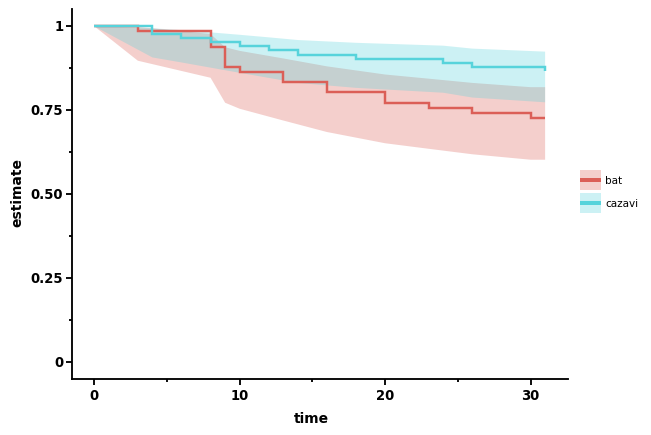

<ggplot: (8765688811987)>

In [123]:
from plotnine import *
from plotnine_prism import *

plot = (ggplot() +
        geom_ribbon(data, aes(x = "time", ymin = "min", ymax = "max", fill = "class"), alpha = 0.3) +
        geom_step(data, aes(x = "time", y = "estimate", colour = "class"), size = 1) +
        ylim(0, 1) +
        theme_prism())
plot

In [90]:
a = scale_color_brewer(type = "qual", palette = "Set2")